In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
#Loading the Excel files and naming the specifications and measurements sheets
spec_file_path = '/Users/yaeesh/Desktop/Git/question_1_2 (1).xlsx'
measurements_file_path = '/Users/yaeesh/Desktop/Git/question_1_2 (1).xlsx'
spec_sheet_name = "Specifications"
measurements_sheet_name = "Measurements"

In [3]:
#As we are comparing between two products, we have defined them separately
product_code_1 = 'LIF001_Y'
product_code_2 = 'LIF002_Y'

In [4]:
spec_data = pd.read_excel(spec_file_path, sheet_name=spec_sheet_name)

In [5]:
measurements_data = pd.read_excel(measurements_file_path, sheet_name=measurements_sheet_name)

In [6]:
#Creating a function to generate the process control charts
def generate_process_control_chart(product_code, column_name, usl_column, lsl_column):
    product_spec_data = spec_data[spec_data['Product Code'] == product_code]
    usl = product_spec_data[usl_column].iloc[0]
    lsl = product_spec_data[lsl_column].iloc[0]
    
    product_measurements_data = measurements_data[measurements_data['Product Code'] == product_code]
    process_data = product_measurements_data[column_name]
    
    mean = np.mean(process_data)
    std = np.std(process_data)
    
    UCL = usl
    LCL = lsl
    
    plt.plot(process_data, marker='o', linestyle='-', label=f'{column_name} Process Data')
    plt.axhline(y=UCL, color='orange', linestyle='--', label=f'{column_name} USL')
    plt.axhline(y=LCL, color='purple', linestyle='--', label=f'{column_name} LSL')
    plt.title(f'Process Control Chart for {column_name} ({product_code})')
    plt.xlabel('Sample')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)

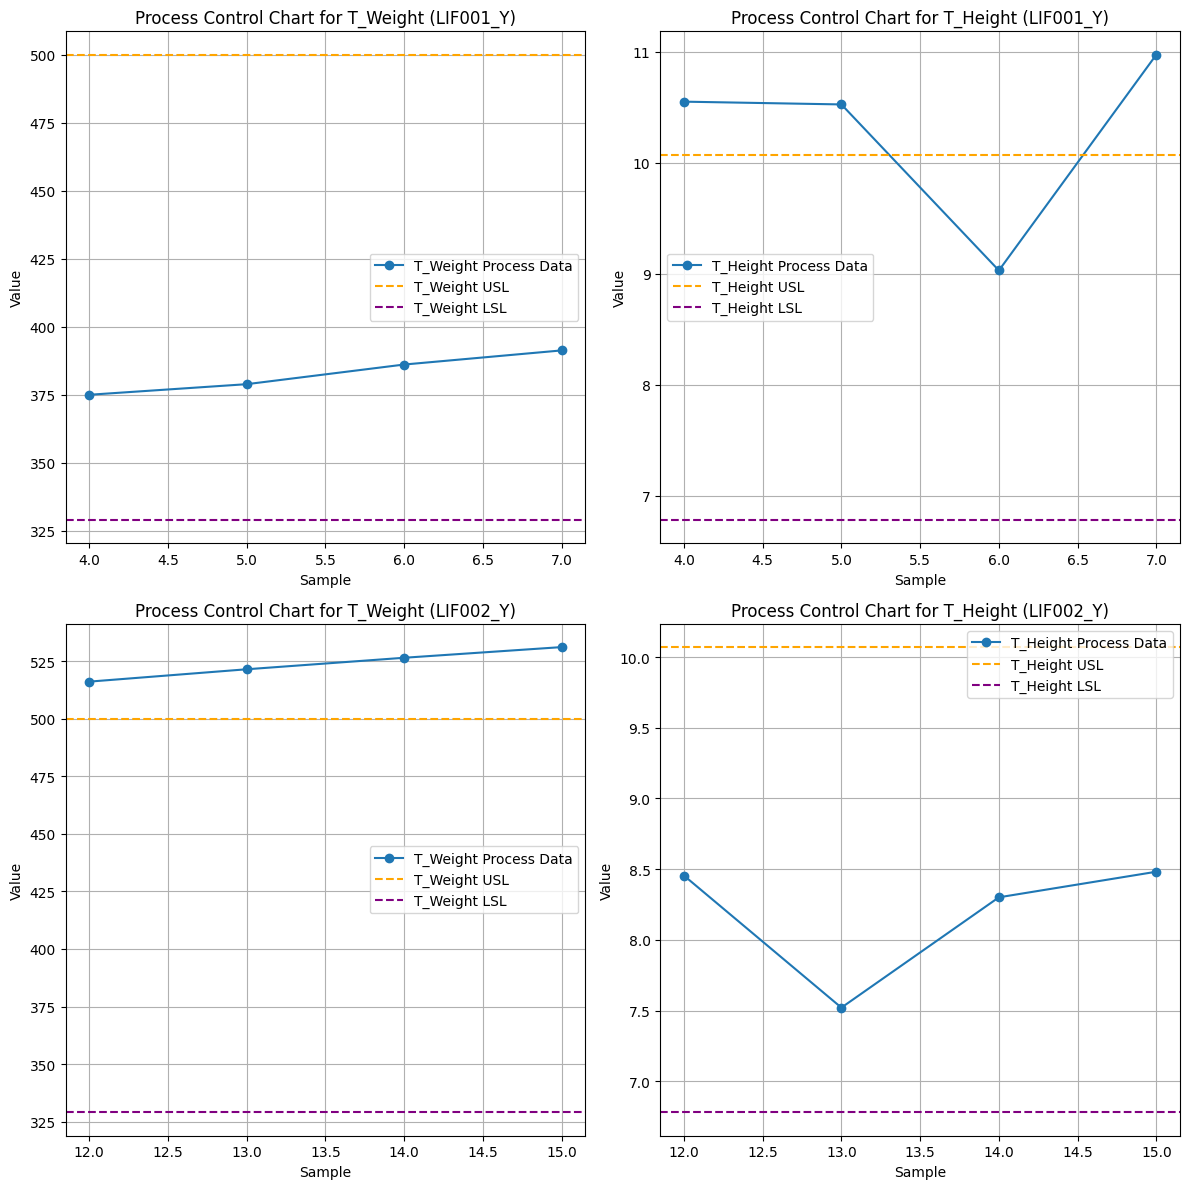

In [7]:
# Creating the process control charts
plt.figure(figsize=(12, 12))

# T_Weight and T_Height Process Charts for the products LIF001_Y and LIF002_Y
plt.subplot(2, 2, 1)
generate_process_control_chart(product_code_1, 'T_Weight', 'Weight_USL', 'Weight_LSL')

plt.subplot(2, 2, 2)
generate_process_control_chart(product_code_1, 'T_Height', 'Height_USL', 'Height_LSL')


plt.subplot(2, 2, 3)
generate_process_control_chart(product_code_2, 'T_Weight', 'Weight_USL', 'Weight_LSL')

plt.subplot(2, 2, 4)
generate_process_control_chart(product_code_2, 'T_Height', 'Height_USL', 'Height_LSL')

plt.tight_layout()
plt.show()